# DSG_ASSIGNMENT

First off, we start by importing the necessary libraries. Since this is a classification problem, we import the libaries which are essential to go about solvinng this problem 

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
# We shall be usinng these 5 algos to determine which one runs the best.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
import xgboost as xgb
from sklearn import  svm
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Data Exploration 


In [2]:
training_set=pd.read_csv('mushroom_train.csv')
test_set=pd.read_csv('mushroom_test.csv')
Y_train=training_set['class']
X_train=training_set.drop('class',axis=1)
X_test=test_set
X_train.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,f,s,e,f,s,f,c,n,b,t,...,p,w,p,w,38,o,e,w,v,l
1,x,y,w,t,p,f,c,n,k,e,...,w,w,p,w,43,o,p,n,v,u
2,f,s,n,t,n,f,c,b,e,e,...,e,e,p,w,37,t,e,w,c,w
3,x,s,e,f,y,f,c,n,b,t,...,p,w,p,w,82,o,e,w,v,l
4,x,s,w,t,l,f,c,b,n,e,...,w,w,p,w,36,o,p,n,s,m


In [3]:
Y_train=Y_train.map({'e':0,'p':1})
#Y_train.head(10)
#X_test.shape is (2438,24)
#X_train.shape is (5686,24)
Y_train.head()


0    1
1    1
2    0
3    1
4    0
Name: class, dtype: int64

In [4]:
pd.options.display.max_columns=500
training_set.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,t,?,215,s,k,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,e,e,94,s,s,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,e,?,244,s,s,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,t,?,286,k,s,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,e,c,110,s,s,w,w,p,w,36,o,p,n,s,m
5,p,x,f,y,f,f,f,c,b,h,e,b,66,k,k,p,n,p,w,23,o,l,h,y,g
6,e,f,s,g,f,n,f,w,b,p,t,e,11,s,s,w,w,p,w,43,o,e,n,a,g
7,e,f,f,n,t,n,f,c,b,u,t,b,207,s,s,g,w,p,w,25,o,p,n,v,d
8,p,x,y,e,f,f,f,c,n,b,t,?,60,s,s,p,p,p,w,50,o,e,w,v,p
9,p,x,s,g,t,f,f,c,b,h,t,b,84,s,s,w,w,p,w,47,o,p,h,v,g


First I ran a check on the training set itself if there were any empty values which needed to be filled in. 
I made use of numpy to evaluate this, fortunately there are no empty data values.

In [5]:
np.where(pd.isnull(training_set))

(array([], dtype=int64), array([], dtype=int64))

In [6]:
X_test.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,b,32,s,s,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,b,7,k,k,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,c,2,s,s,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,b,2,k,k,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,c,10,s,s,w,w,p,w,24,o,p,k,n,m
5,f,f,y,f,f,f,c,b,h,e,b,89,k,k,n,b,p,w,23,o,l,h,y,d
6,x,f,p,f,c,f,c,n,n,e,b,44,s,s,w,w,p,w,24,o,p,n,s,d
7,k,s,n,f,n,a,c,b,n,e,?,564,s,s,o,o,p,o,24,o,p,b,v,l
8,f,y,n,t,n,f,c,b,p,t,b,67,s,s,p,w,p,w,23,o,p,n,v,d
9,f,s,w,t,f,f,c,b,h,t,b,17,s,s,w,w,p,w,23,o,p,h,v,u


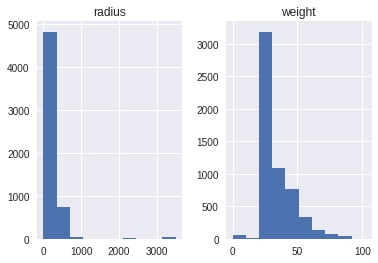

In [7]:
X_train[X_train.dtypes[(X_train.dtypes=='int64')].index.values].hist()
plt.show()

Feature Normalization is done to ensure that classifiers which would use gradiennt descent to classify benfit 
from the normalized datasets. I am importing the normalize method present in sklearn 

In [8]:
from sklearn import preprocessing 
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled_1= min_max_scaler.fit_transform(X_train['radius'])
x_scaled_2= min_max_scaler.fit_transform(X_train['weight'])
x_scaled_3= min_max_scaler.fit_transform(X_test['radius'])
x_scaled_4= min_max_scaler.fit_transform(X_test['weight'])
df_normalized_1 = pd.DataFrame(x_scaled_1)
df_normalized_2=pd.DataFrame(x_scaled_2)
df_normalized_3 = pd.DataFrame(x_scaled_3)
df_normalized_4 = pd.DataFrame(x_scaled_4)
X_train['radius']=df_normalized_1
X_train['weight']=df_normalized_2
X_test['radius']=df_normalized_3
X_test['weight']=df_normalized_4

Since the data has a heavy influence of categorical variables, I went along with the time tested method of one hot encoding. This is chosen over label encoder due to the fact that label encoder inserts some bias into 
the dataset by assuming  one value of a categorical variable to be greater than another. 
For example consider gill_color, here by using a label encoder we will make a tacit assumption that a value, let us assume it to be 'b' will be greater than a value like 'o' which inserts a wrong inference into the dataset
This pitfall is avoided by using one hot encoding.

In [9]:
pd.options.display.max_columns=500
X_train=pd.get_dummies(X_train) #(5686,119)
X_test=pd.get_dummies(X_test) #(2438,115)
X_test.shape

(2438, 115)

A downside of using one hot encoding is that it may so happen that a particular feature may not have any example with a particular value which leads to an imbalance in the number of columns in the test and the training set. Logically the way to go about it would be by adding in the missing columns with all the values in it set to zero 

In [10]:
missing=set(X_train.columns)-set(X_test.columns) #{'cap-shape_c', 'cap-surface_g', 'stalk-color-above-ring_y', 'veil-color_y'}
print missing 


set(['stalk-color-above-ring_y', 'cap-surface_g', 'veil-color_y', 'cap-shape_c'])


For all the missing dummy columns, I replaced them with columns initialized to zero.

In [11]:
# Replace them with values set to 0 
for col in missing:
    X_test[col]=0
print X_test.shape #(2438,119)
X_test.tail()


(2438, 119)


,radius,weight,cap-shape_b,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-color-above-ring_y,cap-surface_g,veil-color_y,cap-shape_c
2433,0.277523,0.210526,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2434,0.488532,0.189474,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2435,0.233945,0.315789,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2436,0.201835,0.200000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2437,0.358945,0.189474,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
corr_df=X_train.corr()
pd.isnull(corr_df[corr_df>0.5][corr_df!=1])

,radius,weight,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
radius,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
weight,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
cap-shape_b,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
cap-shape_c,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

This correlation dataframe that has been created returns NAN values for the test that I have passed to determine if any of the feature columns had a correlation factor of greater than 0.5.

Since any dimensionality reduction techniques gives the best gains when there is a good amount of correlation among data, I have chosen to not use PCA/LDA due to the above mentioned reasons.

# Building the model 


Since we are going to be using multiple models and instantiating every single one of them would be redundant, we will define a class with methods to do exactly that. Every time a model needs to be called we just call this class and it does our work for us. 

In [13]:
class Initialize(object):
    def __init__(self,clf,seed=0,params=None):
        
        self.clf=clf(**params) # since some of the models take only one entry
# To train the model on the given training set 
    def train (self,x,y):
        self.clf.fit(x,y)
# To issue predictions     
    def predict (self,x):
        return self.clf.predict(x)
# In additiion to this, I have defined some global variables that will be frequently used to enhance code readability.
n_train=X_train.shape[0]
n_test=X_test.shape[0]
#Seed=0 # To ensure that same splits in the test and trainig set take place.


I am using a basic stacking model to predict my output. The first level involves contributions from Random Forest, ADAboost, gradient boost and SVM. These models will feed it's inferences to the second model.Since xgboost happens to be the definitive gold standard for boosting algorithms presently, I based my second level on xgboost. Since there are 5 models in our first level I hard coded k=5 for the k-fold classifier.

Kfold is being used to prevent bias in the results, that would be present if we train the models on the entire training set.

In [14]:
kf=KFold(n_train, n_folds=4, random_state=0)
# Now we need to define a method which does this to an effect. We need to split our training set into 5 parts and
# use 4 of them as our training set and use one of them as our cross validation set successively- making 
# "out of fold predictions.

def predict_oof(clf, x_train, y_train, x_test):
    # Initilaizing the nd arrays.
    oof_train = np.zeros((n_train,)) 
    oof_test = np.zeros((n_test,))   
    oof_test_complete = np.empty((4, n_test))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te) 
        #oof_test_complete[i, :] = clf.predict(x_test)
    
    # Using the entire training set to train the model to get predictions on the test set which serves as the
    # expected output for the second tier of the model
    clf.train(x_train,y_train)    
    oof_test=clf.predict(x_test)
    
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

    


# Hypertuning the parameters for the models about to be used 

Following this we are choosing the best parameters for the model by testing it's accuuracy on the entire training and test set. For the other parameters we will be proceeding with the default values.

In [15]:
# Random Forest Parameters
# For the rest of the paraameters I am proceeding with the default values itself.
rf_params= {"n_estimators":[100,200,300,400,500],
            "max_features":["sqrt","log2"],
            "criterion":["gini","entropy"],
            "max_depth":[2,3,4,5]}
best_fit=GridSearchCV(RandomForestClassifier(),param_grid=rf_params,scoring="accuracy",n_jobs=-1)
best_fit.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [16]:
rf_params=best_fit.best_params_
#{'criterion': 'gini',
# 'max_depth': 5,
#'max_features': 'sqrt',
#'n_estimators': 200}

In [17]:
# Gradient Boost Parameters
gb_params={"n_estimators":[300,400,500],
           "learning_rate":[0.1,0.3,0.03,0.01]
          }
best_fit_1= GridSearchCV(GradientBoostingClassifier(),param_grid=gb_params,scoring="accuracy",n_jobs=-1)
best_fit_1.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'learning_rate': [0.1, 0.3, 0.03, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [18]:
gb_params=best_fit_1.best_params_
#{'learning_rate': 0.1, 'n_estimators': 300}

In [19]:
# ADA boost parameters

ad_params={"n_estimators":[200,300,400],
          "learning_rate":[0.01,0.03,0.1,0.3]}
best_fit_2= GridSearchCV(AdaBoostClassifier(),param_grid=ad_params,scoring="accuracy",n_jobs=-1)
best_fit_2.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 300, 400], 'learning_rate': [0.01, 0.03, 0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [20]:
ad_params=best_fit_2.best_params_
#{'learning_rate': 0.1, 'n_estimators': 200}

In [21]:
# SVM parameters
svm_params=[{"C": [1, 10, 100, 1000], "kernel": ["linear"]},
  {"C": [1, 10, 100, 1000], "gamma": [0.001, 0.0001], "kernel": ["rbf"]}]
best_fit_3= GridSearchCV(svm.SVC(),param_grid=svm_params,scoring="accuracy",n_jobs=-1)
best_fit_3.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [22]:
svm_params=best_fit_3.best_params_
#{'C': 1, 'kernel': 'linear'}

The models have been tuned with the parameters that will yield the maximum gains, and these parameters have been stored in the the respective parameter lists.


# Building the first level of the stacking model

## Level-1

In [23]:
# Initializing the models with the initialize class that we created initially
rf = Initialize(clf=RandomForestClassifier, seed=0, params=rf_params)
ada = Initialize(clf=AdaBoostClassifier, seed=0, params=ad_params)
gb = Initialize(clf=GradientBoostingClassifier, seed=0, params=gb_params)
svc = Initialize(clf=svm.SVC, seed=0, params=svm_params)

I have converted dataframes to numpy arrays since I am more comfortable dealing with ndarrays compared to dataframes. It is more versatile for playing around with columns.

In [24]:
y_train = Y_train.ravel() # Since it involves only one dimension hence ravel method works fine on the training set.
x_train = X_train.values # Creates a ndarray from the dataframe 
x_test = X_test.values # Creats a ndarray from the dataframe 

As explained in the blog (link in README), we use kfold clasification to split the training data. We then obtain the training set and the test set for the second tier of our model thorugh the following lines of code. 

In [25]:
rf_oof_train, rf_oof_test = predict_oof(rf,x_train, y_train, x_test) # Random Forest 
ada_oof_train, ada_oof_test = predict_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = predict_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = predict_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

In [26]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel(),
     'SVM':svc_oof_train.ravel()                                   
    })
print base_predictions_train.head(10)
print "/n"
# The test set on which we will be running our second tier.
base_predictions_test = pd.DataFrame( {'RandomForest': rf_oof_test.ravel(),
     'AdaBoost': ada_oof_test.ravel(),
     'GradientBoost': gb_oof_test.ravel(),
     'SVM':svc_oof_test.ravel()                                   
    })
print base_predictions_test.head(10)

   AdaBoost  GradientBoost  RandomForest  SVM
0       1.0            1.0           1.0  1.0
1       1.0            1.0           1.0  1.0
2       0.0            0.0           0.0  0.0
3       1.0            1.0           1.0  1.0
4       0.0            0.0           0.0  0.0
5       1.0            1.0           1.0  1.0
6       0.0            0.0           0.0  0.0
7       0.0            0.0           0.0  0.0
8       1.0            1.0           1.0  1.0
9       1.0            1.0           1.0  1.0
/n
   AdaBoost  GradientBoost  RandomForest  SVM
0         0              0             0    0
1         1              0             0    0
2         0              1             0    0
3         0              0             0    0
4         0              1             1    0
5         0              0             0    0
6         0              1             0    0
7         0              0             0    0
8         0              0             0    0
9         0              0     

## Level-2

Standard extreme gradient boosting model. 

In [27]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(base_predictions_train, y_train)
predictions = gbm.predict(base_predictions_test)


In [41]:
b= pd.DataFrame(predictions,columns=["Predictions"])
b['Predictions']=b["Predictions"].map({0.0:'e',1.0:'p'})

In [42]:
b.head()

,Predictions
0,e
1,p
2,e
3,e
4,e


In [43]:
final_prediction=b.to_csv("prediction.csv")